In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import math

In [3]:
class Problem:
    ### to solve a problem using Evolutionary Algorithms, me must define four methods
    
    def random_solution(self):
        # this method returns a random solution for a given problem
        # ...we need it to create the initial population!
        return []
    
    def evaluate(self, s):
        # this method returns the quality of a given solution s
        # ...we need it to decide which solutions should participate in creating the new population!
        return 0.0
    
    def mutate(self, s):
        # this method returns a slightly modified solution s
        # ...this is one of the evolutionary operators!
        return s[:]
    
    def crossover(self, s1, s2):
        # this method returns a solution that is a combination of its parent solutions - s1 and s2
        # ...this is one of the evolutionary operators!
        return s1[:]
    
    ### additionally, we should define a method that will give us a preview of any given solution s
    def display_solution_param(self, s):
        print(s)

In [4]:
class TSP(Problem):
    cities = 0
    distances = []
    locations = []
    
    def __init__(self, cities, city_coords=None, seed=4432):
        # we draw random locations for the cities and we prepare a matrix of distances between them - it will come useful later!
        
        random.seed(seed)
        self.cities = cities
        
        self.locations = []
        if city_coords is None:
            for i in range(cities):
                self.locations.append((random.random(), random.random()))
        else:
            for i in range(cities):
                self.locations.append(city_coords[i])
        
        self.distances = []
        for i in range(cities):
            self.distances.append([])
            for j in range(cities):
                self.distances[i].append(self.distance(i, j))
                
    def distance(self, c1, c2):
        # euclidean distance between two points on a map
        
        loc1, loc2 = self.locations[c1], self.locations[c2]
        return math.sqrt((loc1[0]-loc2[0])**2 + (loc1[1]-loc2[1])**2)
    
    def random_solution(self):
        # we return a random permutation of numbers, which corresponds to a random order of visiting cities
        
        s = [i for i in range(self.cities)]
        random.shuffle(s)
        return s
    
    def evaluate(self, s):
        # length of the route is equal to the sum of distances between all subsequent cities
        # notice that we include the distance between the first and the last city as well! the route is a loop!
        
        fit = 0
        for i in range(len(s)):
            fit += self.distances[s[i]][s[i+1 if i+1<len(s) else 0]]
        return fit
    
    def mutate(self, s):
        # to mutate a solution, we reverse a random subsequence of the solution
        # the route is a loop, so we need to handle the subsequences that cross the end of the array in a special way!

        sol = s[:]
        c1, c2 = random.sample(range(0, self.cities), 2)
        print(c1, c2)
        if c1 < c2:
            rev = sol[c1:c2+1]
            rev.reverse()
            sol[c1:c2+1] = rev
        else:
            rev = sol[c1:] + sol[:c2+1]
            rev.reverse()
            sol[:(c2+1)] = rev[-(c2+1):]
            sol[c1:] = rev[:-(c2+1)]
        return sol
    
    def crossover(self, s1, s2):
        # to combine two different routes, we use OX (order crossover)
        
        sol1, sol2 = s1[:], s2[:]
        c1, c2 = random.sample(range(0, self.cities), 2)
        if c2 < c1:
            ctmp = c1
            c1 = c2
            c2 = ctmp
        sol1[c1:c2+1] = list(filter(lambda x: x in sol1[c1:c2+1], s2))
        sol2[c1:c2+1] = list(filter(lambda x: x in sol2[c1:c2+1], s1))
        
        return sol1, sol2
    
    def display_solution(self, solution):
        fig, ax = plt.subplots(figsize=(8, 8))

        x = [i[1] for i in [self.locations[c] for c in solution]]
        y = [i[0] for i in [self.locations[c] for c in solution]]
        x.append(x[0])
        y.append(y[0])
        line, = ax.plot(x, y, 'go-',linewidth=2)
            
        plt.xlim((-0.03,1.03))
        plt.ylim((-0.03,1.03))
        plt.show()

In [5]:
class TSP_Poland(TSP):

    def dist(self, x1, y1, x2, y2):
        return ((x1-x2)**2+(y1-y2)**2)**(1/2)

    def __init__(self, seed=1):
        city_names = ["Poznan", "Wroclaw", "Krakow", "Warszawa", "Gdansk", "Katowice", "Lodz",
                       "Bialystok", "Rzeszow", "Szczecin", "Lublin", "Olsztyn", "Kielce", "Gdynia", "Bydgoszcz", "Zakopane"]
        city_coords = {
            "Poznan": (52.409538, 16.931992),
            "Wroclaw": (51.107883, 17.038538),
            "Krakow": (50.049683, 19.944544),
            "Warszawa": (52.237049, 21.017532),
            "Gdansk": (54.372158, 18.638306),
            "Katowice": (50.270908, 19.039993),
            "Lodz": (51.759445, 19.457216),
            "Bialystok": (53.13333, 23.16433),
            "Rzeszow": (50.041187, 21.999121),
            "Szczecin": (53.42894, 14.55302),
            "Lublin": (51.25, 22.56667),
            "Olsztyn": (53.77995, 20.49416),
            "Kielce": (50.87033, 20.62752),
            "Gdynia": (54.51889, 18.53188),
            "Bydgoszcz": (53.1235, 18.00762),
            "Zakopane": (49.29899, 19.94885)
        }      
        super().__init__(len(city_names), [city_coords[city] for city in city_names], seed)
    
    ### DISPLAY (you don't have to read it) ###

    def force_aspect(self, ax, aspect=1):
        im = ax.get_images()
        extent =  im[0].get_extent()
        ax.set_aspect(abs((extent[1]-extent[0])/(extent[3]-extent[2]))/aspect)
        
        
    def display_solution(self, solution):
        self.display_solution_param(solution, True, [11.328361, 27.045778], [49.0025, 54.835778])
        
    def display_solution_param(self, solution, show_map, xlim, ylim):
        fig, ax = plt.subplots(figsize=(8, 8))
        
        if show_map:
            datafile = 'polska.png'
            img = mpimg.imread(datafile)
            plt.imshow(img, zorder=0, extent=[14.245, 24.129139, 49.0025, 54.835778])

        x = [i[1] for i in [self.locations[c] for c in solution]]
        y = [i[0] for i in [self.locations[c] for c in solution]]
        x.append(x[0])
        y.append(y[0])
        line, = ax.plot(x, y, 'go-',linewidth=2)

        if show_map:
            plt.xlabel('Longitude')
            plt.ylabel('Latitude')
            self.force_aspect(ax)
            
        plt.xlim(xlim)
        plt.ylim(ylim)
        plt.show()

**Task 1:** Generate a random route for the TSP_Poland problem. Display the route and three possible mutations of that route. Repeat that for a new instance of the problem. Did the routes change? Why / why not?
**Answer**:<br>
The routes changed only slightly because mutation is just a small change in a genotype that occurs randomly - instead of exploring very different solutions by crossing over, we're exploiting the existing genotype and try the solutions close to the first one generated random solution.

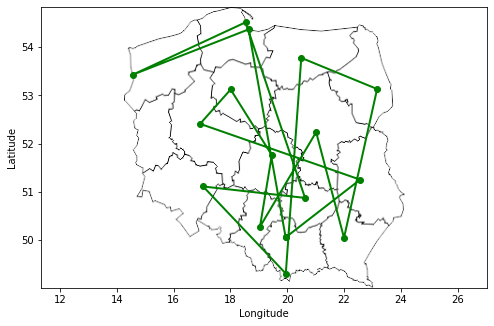

0 14


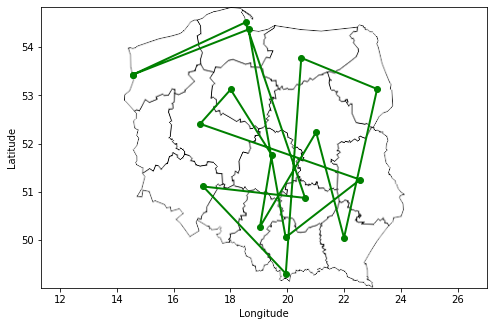

12 6


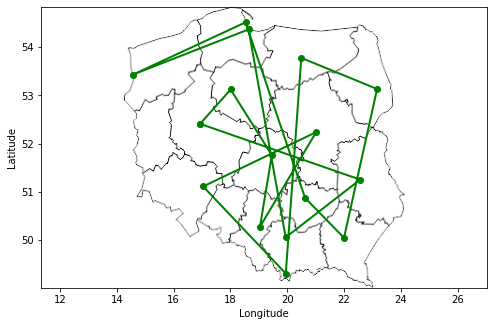

In [6]:
t = TSP_Poland()
r = t.random_solution()
t.display_solution(r)
r2 = t.mutate(r)
t.display_solution(r2)
r3 = t.mutate(r)
t.display_solution(r3)

**Task 2:** Implement an algorithm searching for the best solution by generating random solutions. Write down the average fitness of the best solution after 10, 100, 1000 and 10 000 evaluations over 10 runs.

In [9]:
#generate random solutions
def rand_sol_alg(evals, runs=10):
    best_sols = []
    popsize=evals//runs
    for i in range(runs):
        population=[t.evaluate(t.random_solution()) for i in range(popsize)]
        best_sols.append(min(population))
    return sum(best_sols)/len(best_sols)
evals=[10, 100, 1000, 10000]
print(sum([rand_sol_alg(i) for i in evals])/len(evals))


47.32735786742208


**Task 3:** Implement the generational evolutionary algorithm with tournament selection. Let it be parametrized with four parameters: the size of the population $N$, the size of the tournament $t$, the probability of mutation $p_m$ and the probability of crossover $p_c$. The algorithm should terminate automatically after 50 generations with no improvement.

* Assume $N=20$, $t=3$, $p_m=0.6$ and $p_c=0.2$. For the TSP_Poland problem, write down the average fitness of the best solution after 10, 100, 1000 and 10 000 evaluations over 10 runs. Does the algorithm find better solutions than random search?
* What is the difference between random search and evolution?

In [ ]:
def evoalg_with_tournament(N=20, t=3, pm=0.6, pc=0.2, runs=10,):
    eval_track=0
    stagnation=0
    best_val=float('inf')
    best_sol=[]
    population=[t.random_solution()for i in range(N)]
    while stagnation<50:
        #evaluating populaton
        evaluated_population=[]
        for i in range(N):
            evaluated_population.append(t.evaluate(population[i]))
            eval_track+=1
            if eval_track==evals:
                break
        if eval_track==evals:
            return (min(evaluated_population), population.index(min(evaluated_population)))
        #implementing evolutionary operators
        new_population=[]
        #mutate population
        for i in range(N):
            if random.random()<pm:
                new_population.append(t.mutate(population[i]))
            else:
                new_population.append(population[i])
        #crossover population
        for i in range(N):
            if random.random()<pc:
                new_population.append(t.crossover(new_population[i], new_population[random.randint(0,N-1)]))
        #selecting new population based on tournament selection


**Task 4:** Perform some experiments using different instance sizes for the TSP problem. How do the parameters of the algorithm influence the quality of the solutions found by the algorithm? How do they influence the total number of evaluations made before the algorithm halts? Are the optimal parameter values the same for small and big instances of the TSP problem? Why / why not?

**Task 5:**

* What is the role of a mutation operator in evolutionary algorithms?
* What are the properties of a good mutation operator?
* What is the role of a crossover operator in evolutionary algorithms?
* What are the properties of a good crossover operator?
* What does it mean for the population to converge?
* How do the parameters of the evolutionary algorithm affect the speed of its convergence?
* Does the speed of the algorithm's convergence correlate with the quality of the solutions? What is the reason?
* Can a population escape from a local optimum once it has converged?